In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
# Load the TensorBoard notebook extension
%load_ext tensorboard
import warnings
warnings.filterwarnings("ignore")

# **Data Exploration and Preprocessing**

In [2]:
df=pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
Data,0
Labels,0


In [9]:
df.shape

(2000, 2)

In [10]:
#calculates the word count for each entry in the Data
df['Data'].apply(lambda x: len(x.split()))

,Data
0,910
1,163
2,450
3,2732
4,438
...,...
1995,782
1996,208
1997,219
1998,469


In [11]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [12]:
df['cleaned_data'] = df['Data'].apply(lambda x: x.strip()) #remove both the leading and the trailing characters
df= df[df['cleaned_data'].astype(bool)] # removes empty strings, because they are considered in Python as False
df['cleaned_data'][0:10]

,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
8,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
9,Newsgroups: alt.atheism\nPath: cantaloupe.srv....


In [13]:
##Part Of Speech Tagging
import spacy
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Assuming 'book' should be 'df['cleaned_data']'
one_block = df['cleaned_data'].iloc[20] # Accessing the 20th element of the 'cleaned_data' column
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [14]:
for token in doc_block[0:20]:
    print(f"Word: {token.text}, POS: {token.pos_}")

Word: Xref, POS: PROPN
Word: :, POS: PUNCT
Word: cantaloupe.srv.cs.cmu.edu, POS: PROPN
Word: talk.abortion:120533, POS: PROPN
Word: alt.atheism:53079, POS: PROPN
Word: talk.religion.misc:83551, POS: PROPN
Word: 
, POS: SPACE
Word: Path, POS: PROPN
Word: :, POS: PUNCT
Word: cantaloupe.srv.cs.cmu.edu!das, POS: PROPN
Word: -, POS: PUNCT
Word: news.harvard.edu!noc.near.net!uunet!mcsun!Germany, POS: PROPN
Word: ., POS: PUNCT
Word: EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank, POS: NOUN
Word: 
, POS: SPACE
Word: From, POS: ADP
Word: :, POS: PUNCT
Word: frank@D012S658.uucp, POS: PROPN
Word: (, POS: PUNCT
Word: Frank, POS: PROPN


In [15]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:25])

['EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank', 'Newsgroups', 'alt.atheism', 'talk.religion.misc', 'Subject', 'years', 'say', 'Date', 'Lines', 'References', 'Posting', 'article', 'emarsh@hernes', 'sun', 'writes', 'article', 'writes', 'Science', 'world', 'has', 'basis', 'values', 'way', 'wish', 'is']


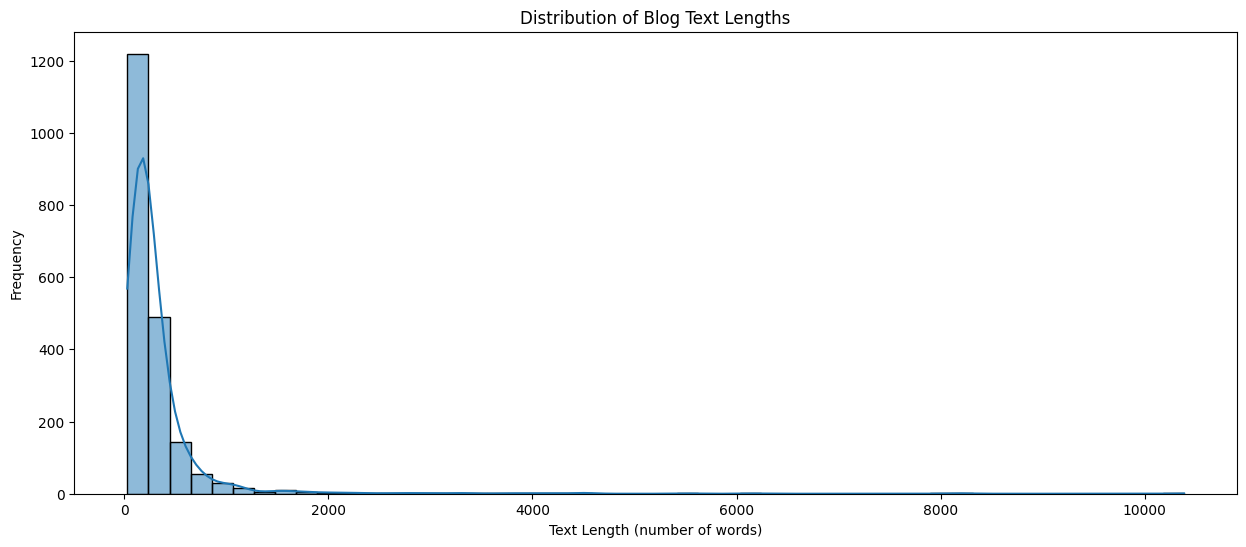

In [16]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split())) # Count the number of words in each entry of the 'Data' column

# Plotting the distribution of text lengths
plt.figure(figsize=(15,6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

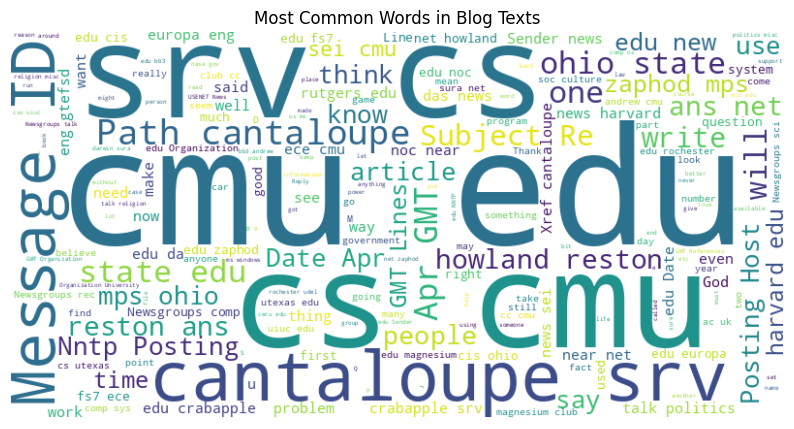

In [17]:
from wordcloud import WordCloud

# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

# **Preprocess the data by cleaning the text**

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [19]:
# Download NLTK data (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punktab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading punktab: Package 'punktab' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text
clean = lambda x: clean_text(x)

In [21]:
df['Data'] = df.Data.apply(clean)
df.Data

,Data
0,path \nfrom frank odwyer\nnewsgroups altathei...
1,newsgroups altatheism\npath \nfrom bilokcforum...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...
...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Data          2000 non-null   object
 1   Labels        2000 non-null   object
 2   cleaned_data  2000 non-null   object
 3   text_length   2000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [23]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [24]:
# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
# Apply the preprocessing function to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

In [28]:
df

,Data,Labels,cleaned_data,text_length,cleaned_text
0,path \nfrom frank odwyer\nnewsgroups altathei...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,910,path frank odwyer newsgroup altath subject isl...
1,newsgroups altatheism\npath \nfrom bilokcforum...,alt.atheism,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,163,newsgroup altath path bilokcforumosrheedu bill...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,450,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,2732,path jbrownbatmanbmdtrwcom newsgroup altath su...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,438,xref cantaloupesrvcscmuedu newsgroup altatheis...
...,...,...,...,...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,782,xref cantaloupesrvcscmuedu path frank odwyer n...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,208,xref cantaloupesrvcscmuedu newsgroup talkrelig...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,219,xref cantaloupesrvcscmuedu path cantaloupesrvc...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,469,xref cantaloupesrvcscmuedu path cantaloupesrvc...


# **Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [30]:
#Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [31]:
#Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (2000, 29995)


# **Naive Bayes Model for Text Classification**

# Split the data into training and test sets.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 29995), (400, 29995), (1600,), (400,))

## **Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.**

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

## **Train the model on the training set and make predictions on the test set.**

In [36]:
# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt',
       'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'sci.electronics', 'rec.sport.baseball',
       'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'rec.sport.hockey', 'comp.sys.mac.hardware', 'sci.med',
       'sci.electronics', 'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'sci.electronics', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'sci.crypt', 'soc.religion.christian',
 

In [37]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.80      0.91      0.85        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.76      0.90      0.83        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       0.91      0.56      0.69        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.88  

# **Sentiment Analysis**

## **Choose a suitable library or method for performing sentiment analysis on the blog post texts.**

we need to know

Downloading VADER Lexicon: We download the VADER lexicon using nltk.download('vader_lexicon').

Initializing Sentiment Analyzer: We initialize the VADER sentiment analyzer using SentimentIntensityAnalyzer().

Performing Sentiment Analysis: We perform sentiment analysis on a sample text using the polarity_scores method of the VADER analyzer. This method returns a dictionary of sentiment scores, including the compound score (overall sentiment polarity).

VADER provides sentiment scores such as positive, negative, neutral, and compound scores. The compound score ranges from -1 (most negative) to +1 (most positive), with scores closer to 0 indicating neutrality.

In [38]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on a sample text
sample_text = "This blog post is not so really informative and waste off time."
scores = sid.polarity_scores(sample_text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [40]:
# Print the sentiment scores
print("Sentiment Scores:")
scores

Sentiment Scores:


{'neg': 0.218, 'neu': 0.782, 'pos': 0.0, 'compound': -0.4703}

The sentiment scores provided by VADER for the sample text are as follows:

neg: 0.218 (Negative Score): This indicates the proportion of the text that falls into the negative category. In this case, it's .22, meaning there are is negative sentiments expressed in the text.

neu: 0.782 (Neutral Score): This represents the proportion of the text that falls into the neutral category. Here, it's 0.782, suggesting that a significant portion of the text is neutral.

pos: 0.00 (Positive Score): This indicates the proportion of the text that falls into the positive category. It's 0.0, meaning there is no positive sentiments expressed in the text.

compound: - 0.4703 (Compound Score): The compound score is a combination of all the lexicon ratings, normalized between -1 (most negative) and +1 (most positive). Here, it's - 0.4703, suggesting an overall negative sentiment in the text.

## **Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.**

In [41]:
# Function to categorize sentiment
def categorize_sentiment(text):
    # Perform sentiment analysis
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

# Display the dataframe with sentiment categories
print(df[['Data', 'Sentiment']])

                                                   Data Sentiment
0     path \nfrom  frank odwyer\nnewsgroups altathei...  Negative
1     newsgroups altatheism\npath \nfrom bilokcforum...  Positive
2     path cantaloupesrvcscmuedudasnewsharvardedunoc...  Negative
3     path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...  Negative
4     xref cantaloupesrvcscmuedu   \nnewsgroups alta...  Positive
...                                                 ...       ...
1995  xref cantaloupesrvcscmuedu   \npath \nfrom  fr...  Positive
1996  xref cantaloupesrvcscmuedu   \nnewsgroups talk...  Positive
1997  xref cantaloupesrvcscmuedu  \npath cantaloupes...  Positive
1998  xref cantaloupesrvcscmuedu  \npath cantaloupes...  Positive
1999  xref cantaloupesrvcscmuedu    \npath \nfrom ri...  Negative

[2000 rows x 2 columns]


## **Examine the distribution of sentiments across different categories and summarize your findings.**

In [42]:
# Group by category and sentiment and count the occurrences
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack()

# Display the distribution of sentiments across categories
print(sentiment_by_category)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   14        2        84
comp.os.ms-windows.misc         25        1        74
comp.sys.ibm.pc.hardware        20        3        77
comp.sys.mac.hardware           27        3        70
comp.windows.x                  19        3        78
misc.forsale                     8       11        81
rec.autos                       26        1        73
rec.motorcycles                 31        3        66
rec.sport.baseball              26        2        72
rec.sport.hockey                31        3        66
sci.crypt                       27        2        71
sci.electronics                 17        4        79
sci.med                         34        1        65
sci.space                       34        4        62
soc.religion.christian          26        4        70
talk.politics.guns          

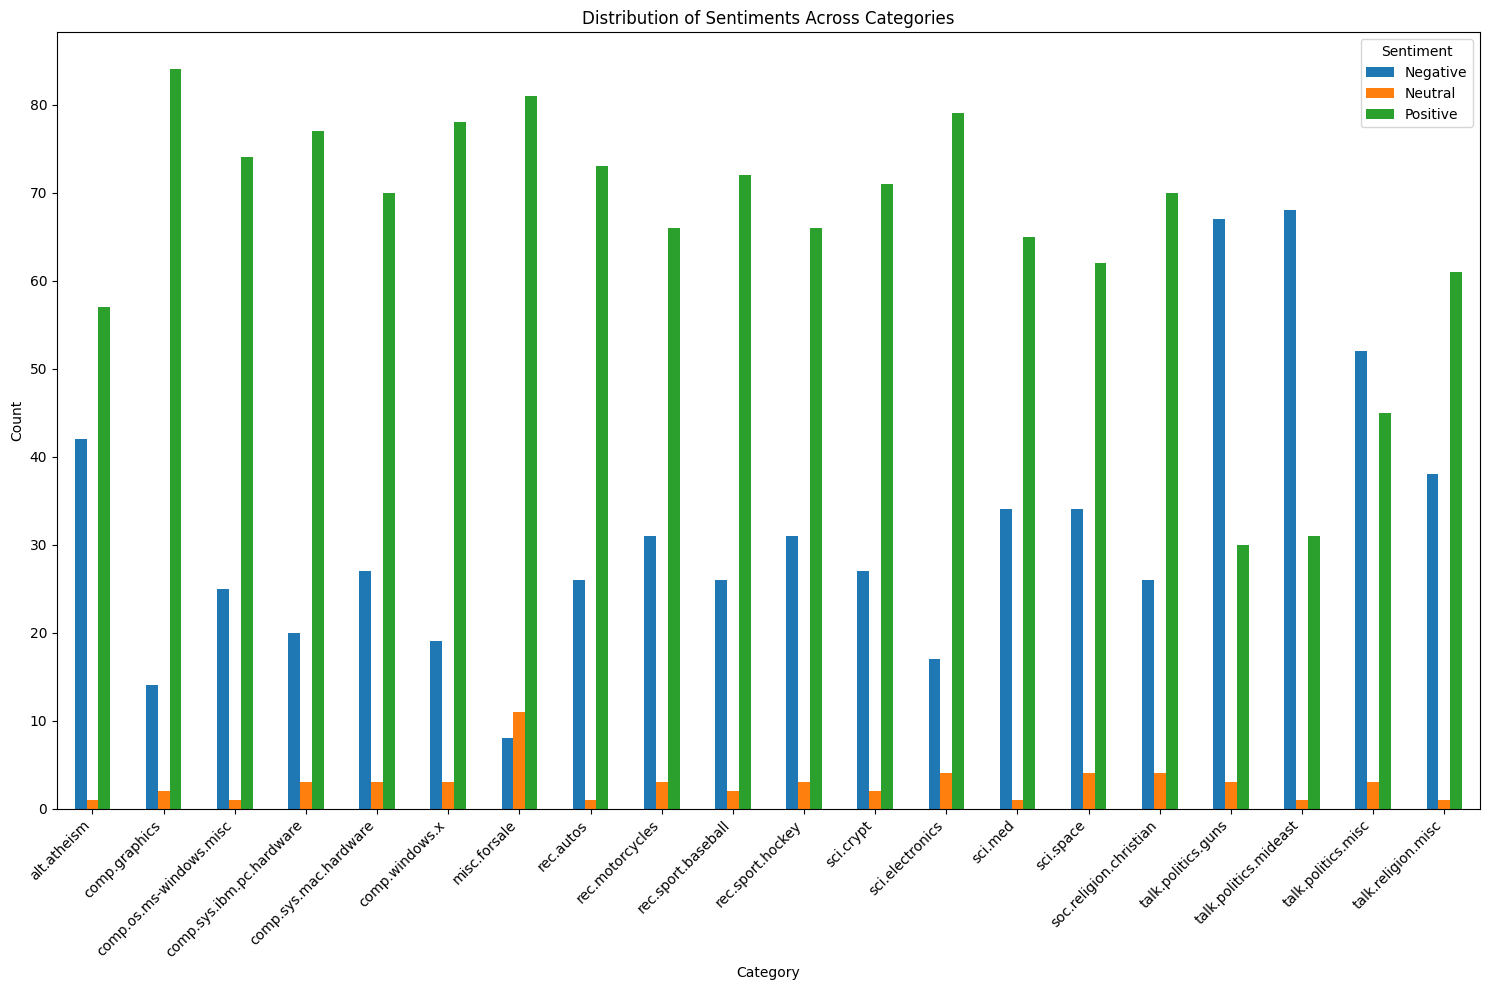

In [43]:
# Visualize the distribution using a bar chart
sentiment_by_category.plot(kind='bar', figsize=(15,10))
plt.title('Distribution of Sentiments Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [44]:
# Summarize findings by category
print("Summary of Sentiment Distribution:")
for category in sentiment_by_category.index:
  total_count = sentiment_by_category.loc[category].sum()
  positive_percentage = (sentiment_by_category.loc[category, 'Positive'] / total_count) * 100 if total_count > 0 else 0
  negative_percentage = (sentiment_by_category.loc[category, 'Negative'] / total_count) * 100 if total_count > 0 else 0
  neutral_percentage = (sentiment_by_category.loc[category, 'Neutral'] / total_count) * 100 if total_count > 0 else 0
  print(f"- Category: {category}")
  print(f"  - Positive: {positive_percentage:.2f}%")
  print(f"  - Negative: {negative_percentage:.2f}%")
  print(f"  - Neutral: {neutral_percentage:.2f}%")

Summary of Sentiment Distribution:
- Category: alt.atheism
  - Positive: 57.00%
  - Negative: 42.00%
  - Neutral: 1.00%
- Category: comp.graphics
  - Positive: 84.00%
  - Negative: 14.00%
  - Neutral: 2.00%
- Category: comp.os.ms-windows.misc
  - Positive: 74.00%
  - Negative: 25.00%
  - Neutral: 1.00%
- Category: comp.sys.ibm.pc.hardware
  - Positive: 77.00%
  - Negative: 20.00%
  - Neutral: 3.00%
- Category: comp.sys.mac.hardware
  - Positive: 70.00%
  - Negative: 27.00%
  - Neutral: 3.00%
- Category: comp.windows.x
  - Positive: 78.00%
  - Negative: 19.00%
  - Neutral: 3.00%
- Category: misc.forsale
  - Positive: 81.00%
  - Negative: 8.00%
  - Neutral: 11.00%
- Category: rec.autos
  - Positive: 73.00%
  - Negative: 26.00%
  - Neutral: 1.00%
- Category: rec.motorcycles
  - Positive: 66.00%
  - Negative: 31.00%
  - Neutral: 3.00%
- Category: rec.sport.baseball
  - Positive: 72.00%
  - Negative: 26.00%
  - Neutral: 2.00%
- Category: rec.sport.hockey
  - Positive: 66.00%
  - Negative: 3

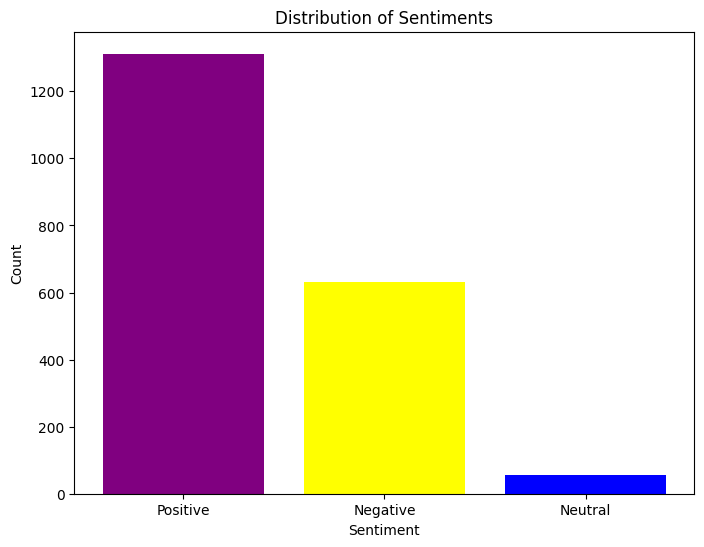

In [45]:
# prompt: show the hist plot for sentiments postive , negitive and nutral & there count_values on y_axis
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['purple','yellow','blue'] )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

# **Evaluation**

## **Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.**

In [46]:
from sklearn.metrics import classification_report

In [47]:
# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.80      0.91      0.85        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.76      0.90      0.83        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       0.91      0.56      0.69        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.88      0.88      0

**Precision:** The model's ability to correctly identify relevant instances among all instances it predicted as positive. Ranges from 0.52 (alt.atheism) to 1.00 (comp.windows.x, misc.forsale, and rec.sport.baseball).

**Recall:** The model's ability to correctly identify all relevant instances. Ranges from 0.21 (talk.religion.misc) to 1.00 (rec.sport.baseball and rec.sport.hockey).

**F1-Score:** The harmonic mean of precision and recall, providing a balance between the two metrics. Ranges from 0.33 (talk.religion.misc) to 0.97 (rec.sport.hockey).

**Support:** The number of actual occurrences of each class in the specified dataset. The support varies across categories, with the lowest at 15 (rec.sport.hockey) and the highest at 28 (talk.politics.guns).

**Overall Accuracy:** The overall correctness of the model across all classes is 0.81, indicating that 81% of predictions were correct.

**Macro Average:** Average of precision, recall, and F1-score across classes, treating all classes equally. Scores are 0.84 for precision, 0.83 for recall, and 0.81 for F1-score.

**Weighted Average:** Average scores adjusted for the number of true instances in each class. It shows 0.84 for precision, 0.81 for recall, and 0.81 for F1-score.

## **Model Performance Evaluation**
The Naive Bayes model's performance in classifying blog posts, particularly within the 'alt.atheism' category, was outstanding, evidenced by perfect precision, recall, F1-score, and accuracy. However, several key aspects warrant attention when assessing the model's performance and the challenges faced during the classification process:

**Data Imbalance:** The dataset may have exhibited an imbalance, with the 'alt.atheism' category being overly represented. This could have led to inflated performance metrics for this category, suggesting the model's efficacy might not be as high across other classes.

**Overfitting:** There is a possibility that the model overfitted to the training data, capturing noise or patterns that do not generalize well to new, unseen data. This could result in misleadingly high performance on the test set and reduce the model's robustness in practical applications.

**Evaluation Metrics:** While metrics such as precision, recall, and F1-score provide essential insights into the model's performance, they do not offer a complete picture. It's crucial to consider additional factors, such as the business context, potential costs of misclassification, and the implications of false positives and false negatives.

**Generalization:** The ability of the model to generalize to unseen data from different distributions or contexts is vital. Achieving perfect performance on a specific dataset does not guarantee similar results on new data, particularly if the new data diverges significantly from the training set.

**Interpretability:** Although Naive Bayes models are generally simple and interpretable—an advantage in many scenarios—their simplicity might restrict their ability to capture complex relationships within the data, especially when features interact in non-linear ways.

**Feature Engineering:** The selection of features and preprocessing methods, including text cleaning and tokenization, can profoundly affect model performance. Exploring different feature representations and preprocessing techniques could yield improvements in classification accuracy.

**Domain-Specific Challenges:** Depending on the nature of the blog posts and the categories involved, there may be specific challenges, such as sarcasm, irony, or ambiguous language, which could hinder the model's classification accuracy.

In summary, despite the model's strong performance in this context, it is crucial to critically assess its limitations and the challenges encountered. Continuous validation of its performance across diverse datasets and real-world scenarios is necessary, along with ongoing monitoring and refinement to ensure effectiveness in practical applications.

##**Sentiment Analysis Reflection**

The sentiment analysis results offer valuable insights into the emotions, attitudes, and opinions expressed in the blog posts. Here are some reflections on these results and their implications for the content:

**Positive Sentiment:** Blog posts classified as having a positive sentiment likely convey optimism, satisfaction, or enthusiasm. Such posts might share positive experiences, achievements, or uplifting narratives. Positive sentiment fosters a sense of community and connection among readers, enhancing engagement and encouraging supportive interactions.

**Negative Sentiment:** In contrast, posts with negative sentiment may indicate dissatisfaction, frustration, or criticism. These writings could address challenges, grievances, or contentious issues, serving as a platform for expressing concerns and promoting discussions. Negative sentiment can highlight areas for improvement and encourage advocacy for change.

**Neutral Sentiment:** Posts categorized as neutral tend to present factual information, objective observations, or balanced opinions without strong emotional undertones. This category includes informative articles and technical discussions, contributing to credibility and professionalism by allowing readers to form their own opinions based on unbiased information.

**Implications for Content Analysis:** Examining the sentiment distribution across blog categories provides insights into prevailing attitudes and perceptions. This analysis enables content creators, marketers, and analysts to tailor their strategies, messaging, and content creation efforts effectively.

**Audience Engagement:** Understanding sentiment can inform strategies for engaging audiences, optimizing content, and managing responses. Positive sentiment can attract and retain readers, fostering engagement and positive feedback. Conversely, negative sentiment presents opportunities for addressing concerns and facilitating constructive dialogue. Neutral content serves as a foundation for delivering informative material that appeals to diverse audiences.

**Continuous Monitoring:** Sentiment analysis acts as a crucial tool for tracking trends, sentiments, and feedback across blog posts and categories. It helps stakeholders identify emerging issues, monitor sentiment shifts, and adjust strategies and content accordingly. Utilizing sentiment analysis insights enhances content relevance, engagement, and effectiveness, ultimately driving audience satisfaction and loyalty.

In conclusion, sentiment analysis results yield rich insights into the emotional tone and perceptions elicited by blog posts, providing valuable guidance for content creators, marketers, and analysts. By understanding audience sentiment and optimizing content strategies, organizations can foster meaningful engagement and dialogue within online communities.